<a href="https://colab.research.google.com/github/ShivamAryaJha/Raining-Cats-Dogs/blob/master/RainingCats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(
                                                           directory=train_dir,   
                                                           batch_size=128,
                                                           target_size=(150,150),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=128,
                                                              directory=validation_dir,
                                                              target_size=(150, 150),
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
print(train_data_gen[0][0].shape) 

(128, 150, 150, 3)


In [ ]:
model = Sequential()
model.add(Conv2D( 16, 3, padding = 'same', activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D( 32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D( 64, 3, padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile( optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [ ]:
sol = model.fit_generator(
    train_data_gen, 
    steps_per_epoch = 2000 // 128,
     epochs = 15, 
     validation_data =  val_data_gen, 
     validation_steps= 1000 // 128)


Epoch 1/15
15/15 [==============================] - 8s 520ms/step - loss: 0.9623 - accuracy: 0.5091 - val_loss: 0.6924 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 8s 530ms/step - loss: 0.6902 - accuracy: 0.4947 - val_loss: 0.6899 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 8s 524ms/step - loss: 0.6819 - accuracy: 0.5337 - val_loss: 0.6617 - val_accuracy: 0.5569
Epoch 4/15
15/15 [==============================] - 8s 521ms/step - loss: 0.6514 - accuracy: 0.5759 - val_loss: 0.6222 - val_accuracy: 0.5971
Epoch 5/15
15/15 [==============================] - 8s 521ms/step - loss: 0.6298 - accuracy: 0.6094 - val_loss: 0.6243 - val_accuracy: 0.5792
Epoch 6/15
15/15 [==============================] - 8s 524ms/step - loss: 0.5870 - accuracy: 0.6453 - val_loss: 0.5964 - val_accuracy: 0.6395
Epoch 7/15
15/15 [==============================] - 8s 527ms/step - loss: 0.5469 - accuracy: 0.6891 - val_loss: 0.5848 - val_accuracy: 0.6596
Epoch 

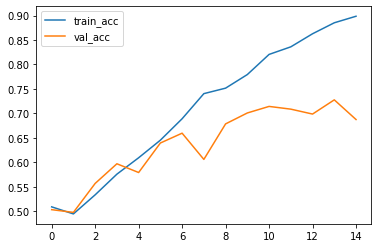

In [ ]:
x = np.arange(1, 16)
plt.plot(sol.history['accuracy'], label = 'train_acc')
plt.plot( sol.history['val_accuracy'], label = 'val_acc')
plt.legend()



In [ ]:
sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.show()

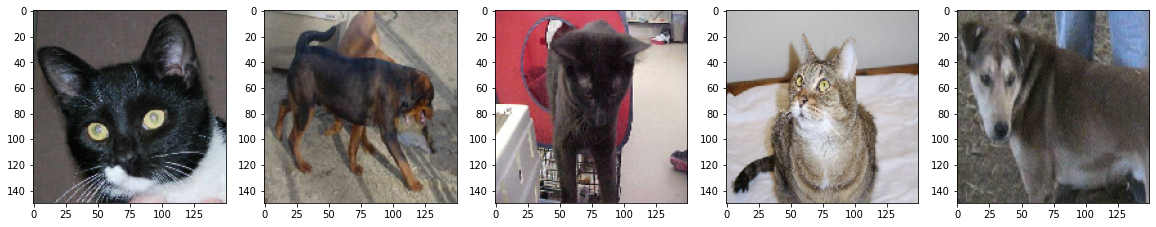

Found 2000 images belonging to 2 classes.


In [ ]:
imgl = [train_data_gen[0][0][i] for i in range(5)]
plotImages(imgl)
newgen = ImageDataGenerator(rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5)
train_data = newgen.flow_from_directory(
                                                           directory=train_dir,   
                                                           batch_size=128,
                                                           target_size=(150,150),
                                                           class_mode='binary')


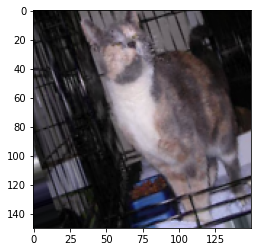

In [ ]:
imgl = [train_data[0][0][0] for i in range(5)]
plt.imshow(train_data[0][0][0])

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model_new.compile( optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy'])


In [ ]:
history = model_new.fit_generator(
    train_data,
    steps_per_epoch=2000 // 128,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000// 128
)


Epoch 1/15
15/15 [==============================] - 16s 1s/step - loss: 0.8240 - accuracy: 0.5139 - val_loss: 0.6928 - val_accuracy: 0.4911
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.6927 - accuracy: 0.5016 - val_loss: 0.6917 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.6851 - accuracy: 0.5069 - val_loss: 0.6724 - val_accuracy: 0.5301
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6764 - accuracy: 0.5139 - val_loss: 0.6714 - val_accuracy: 0.5871
Epoch 5/15
15/15 [==============================] - 16s 1s/step - loss: 0.6649 - accuracy: 0.5839 - val_loss: 0.6839 - val_accuracy: 0.5212
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6595 - accuracy: 0.5598 - val_loss: 0.6446 - val_accuracy: 0.6038
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6533 - accuracy: 0.5871 - val_loss: 0.6578 - val_accuracy: 0.5301
Epoch 8/15
15/15 [==

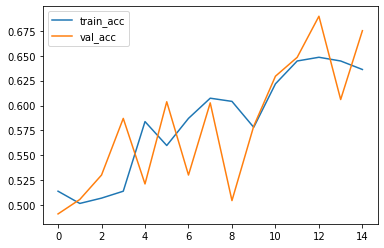

In [ ]:
x = np.arange(1, 16)
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot( history.history['val_accuracy'], label = 'val_acc')
plt.legend()

